In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


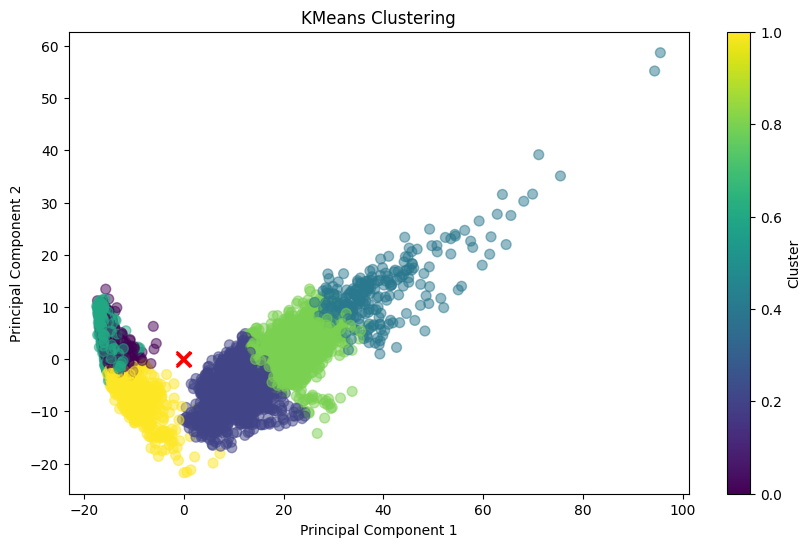

In [8]:
import os
from dotenv import load_dotenv
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
load_dotenv()

filepath = os.getenv('FILE_PATH')
data = pd.read_csv(filepath)

data = data.drop(columns=['subject', 'Activity'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k = 6

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(data_scaled)

cluster_centers = kmeans.cluster_centers_

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
